Investigating Granger Causality between US Chicken Population and Egg Production from 1930 to 1983

Important Note: The dataset used below is exported from RStudios' 'lmtest' package as ChickEgg.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# The output has been cleared to just include the graph below and the results.
# We load our dataset.

In [ ]:
ChickEgg = pd.read_csv('/Users/EKIM/Desktop/ChickEgg.csv')

In [ ]:
ChickEgg.head(10) # Important note: Egg population is measured in millions of dozens

In [ ]:
# Lets visualize the data

In [ ]:
x = ChickEgg.year
y1 = ChickEgg['chicken']
y2 = ChickEgg['egg']

In [ ]:
# We are going to create a plot with 2 Y-Axis that will indicate chicken population and egg production against
# the X-axis year.

<function matplotlib.pyplot.show(close=None, block=None)>

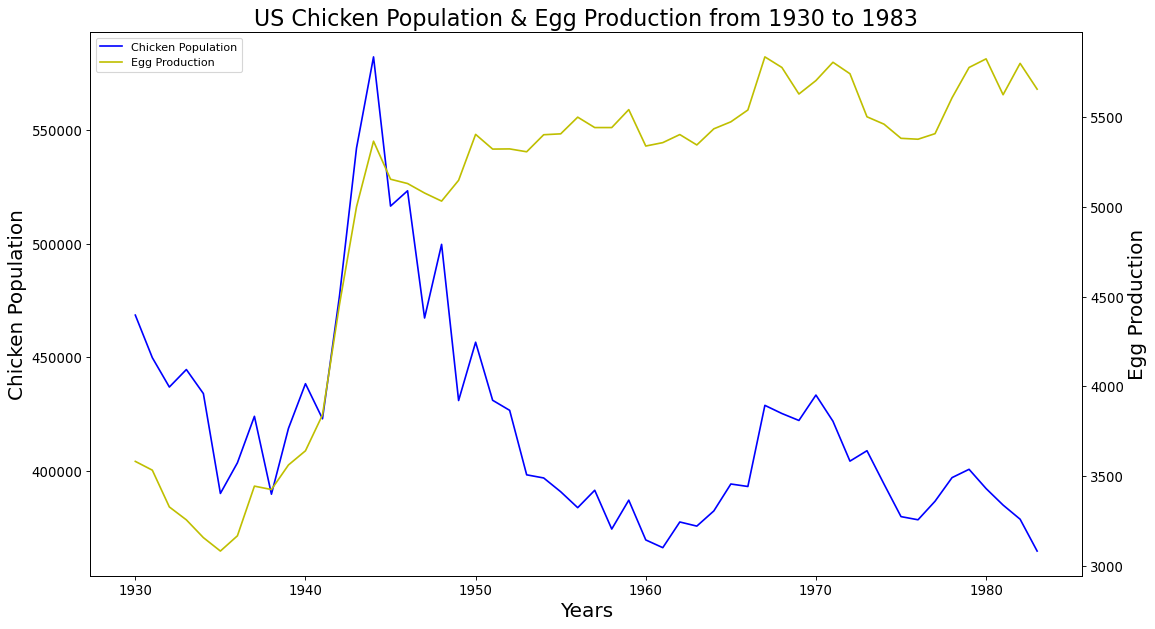

In [9]:
# First we plot Chicken Population on the left Y-Axis

fig, axis1 = plt.subplots(1,1,figsize = (16,9), dpi = 80)
line_1 = axis1.plot(x, y1, 'b',label = 'Chicken Population')

# We now plot the 2nd Y axis, egg production
axis2 = axis1.twinx() # twinx() allows us to create another axes that shares the same X axis
line_2 = axis2.plot(x, y2, 'y',label = 'Egg Production')

# Customising Labels and Adding Titles

axis1.set_xlabel('Years', color = 'k', fontsize = 18)
axis1.tick_params(axis ='x', labelsize = 12)

axis1.set_ylabel('Chicken Population',color = 'k', fontsize = 18)
axis1.tick_params(axis = 'y',labelsize = 12)

axis2.set_ylabel('Egg Production', color = 'k', fontsize = 18)
axis2.tick_params(axis = 'y', labelsize = 12)

axis2.set_title('US Chicken Population & Egg Production from 1930 to 1983', fontsize = 20)

#Legend

lines = line_1 + line_2
labels = [line.get_label() for line in lines]

plt.legend(lines, labels, loc = "upper left")
plt.show

In [ ]:
# We use the grangercausalitytests() function for this, the notation is as follows
# grangercausalitytests(somedata[['X','Y']], n ), with this notation, we are testing if lagged values of Y
# Granger Cause X up to a lag of 'n'.

In [ ]:
grangercausalitytests(ChickEgg[['egg','chicken']], 5) # we are checking here if chickens Granger Cause eggs,

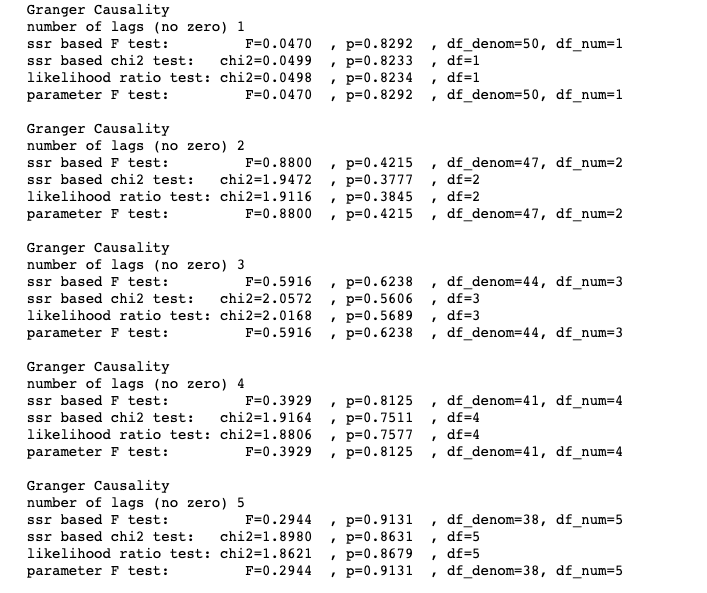

In [ ]:
# Up to lag 5 we find that the p-value is not less than our chosen value of significance that is 0.05. 
# This means that we cannot reject the null, therefore the number of chickens is not useful in predicting number of eggs

In [ ]:
# Lets run it in reverse now, and check if eggs Granger Cause chickens

In [ ]:
grangercausalitytests(ChickEgg[['chicken','egg']], 5)

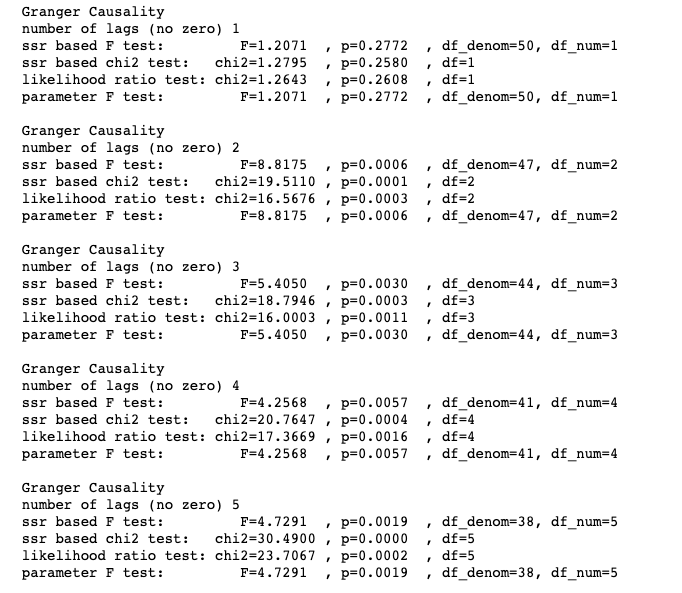

In [ ]:
# We now see that starting from lag 2 that the p-value is less than 0.05. So we can reject the Null Hypothesis 
# And state with 95% confidence that, the egg came first :)

In [ ]:
# ---------------------------------------------------------------------------------------------------------------